In [364]:
# Importando as funções necessárias
from __future__ import print_function

import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [365]:
# Lendo o dataset e imprimindo uma amostra
breast_cancer = pd.read_csv('../input/data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [366]:
# Descrevendo as informações dos tipos de dados do dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [367]:
# Verificando o tamanho do dataset (569 linhas / 33 colunas)
breast_cancer.shape

(569, 33)

In [368]:
# Gerando estatísticas descritivas do dataset que apresentam um resumo dos dados, excluindo valores nulos
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [369]:
# Contagem de registros agrupados pela coluna 'diagnosis', que representa o diagnóstico (B = Benigno / M = Maligno)
breast_cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [370]:
# Contagem de registros nulos por coluna
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [371]:
# As colunas 'id' e 'Unnamed: 32' não são úteis para a análise e serão descartadas 
feature_names = breast_cancer.columns[2:-1]
x = breast_cancer[feature_names]
# A coluna 'diagnosis' é a característica que vamos prever
y = breast_cancer.diagnosis

In [372]:
# Transforma os dados da coluna 'diagnosis' para valores binários (M = 1 / B = 0)
class_le = LabelEncoder()
y = class_le.fit_transform(breast_cancer.diagnosis.values)

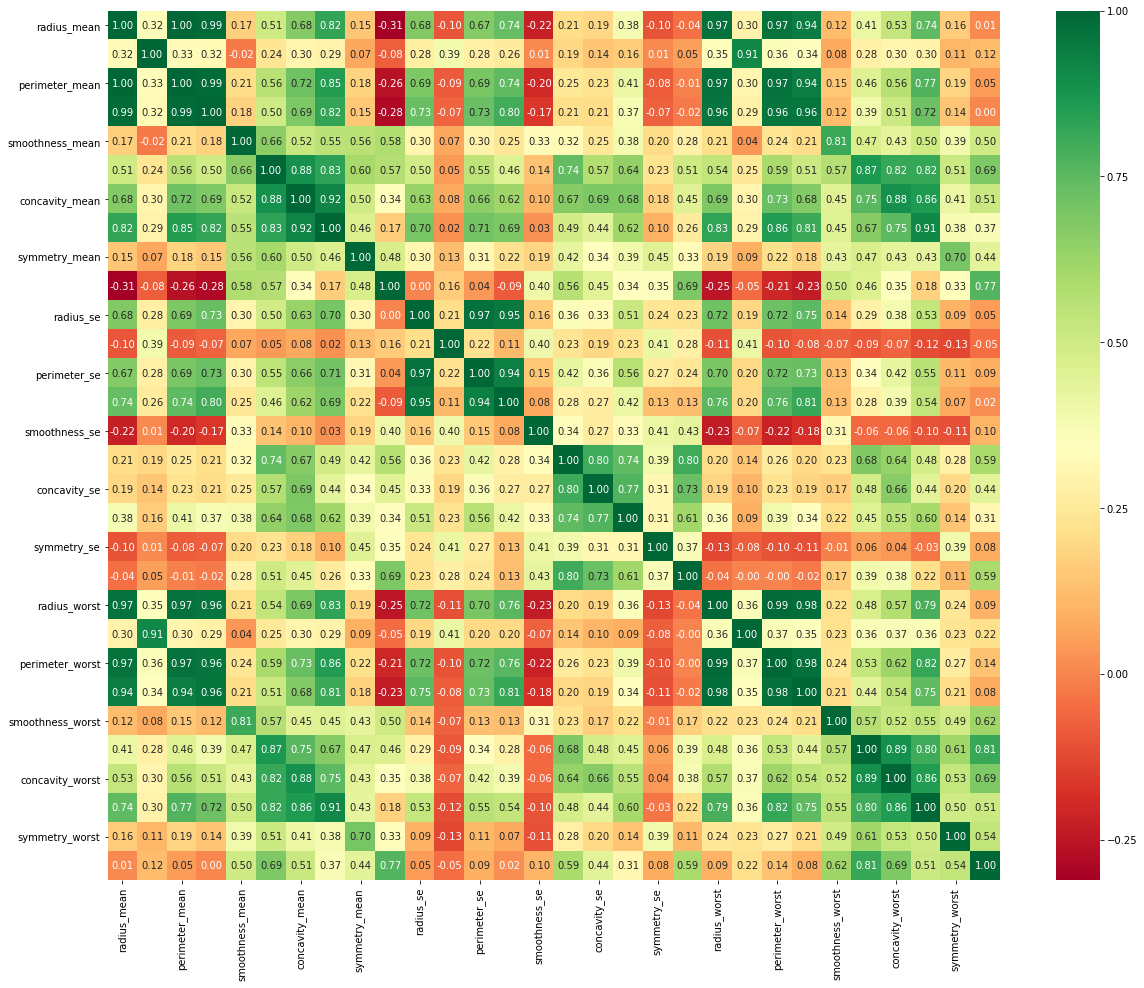

In [373]:
# Gera uma matriz de correlação (heatmap) que fornece informações úteis sobre a relação entre cada variável do conjunto de dados
sns.heatmap(
    data=x.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

fig = plt.gcf()
fig.set_size_inches(20, 16)

plt.show()

In [374]:
# Obtendo os conjuntos de treino e teste, separando 32% do conjunto de dados para teste (test_size=0.32) e o restante para treino
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=42,
    test_size=0.32
)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(386, 30) (386,)
(183, 30) (183,)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_98 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 52        
Total params: 5,677
Trainable params: 5,677
Non-trainable params: 0
_________________________________________________________________
Train on 386 samples, validate on 183 samples
Epoch 1/200
386/386 [==============================] - 1s 2ms/sample - loss: 0.6916 - acc: 0.6166 - val_loss: 0.6316 - val_acc: 0.6503
Epoch 2/200
386/386 [==============================] - 0s 59us/sample - loss: 0.6559 - acc: 0.6166 - val_loss: 0.6076 - val_acc: 0.6503
Epoch 3/200
386/386 [==============================] - 0s 55us/sample - loss: 0.6319 - 

386/386 [==============================] - 0s 58us/sample - loss: 0.3619 - acc: 0.8705 - val_loss: 0.2812 - val_acc: 0.9290
Epoch 56/200
386/386 [==============================] - 0s 54us/sample - loss: 0.3609 - acc: 0.8679 - val_loss: 0.2778 - val_acc: 0.9290
Epoch 57/200
386/386 [==============================] - 0s 56us/sample - loss: 0.3594 - acc: 0.8679 - val_loss: 0.2755 - val_acc: 0.9180
Epoch 58/200
386/386 [==============================] - 0s 58us/sample - loss: 0.3569 - acc: 0.8679 - val_loss: 0.2725 - val_acc: 0.9180
Epoch 59/200
386/386 [==============================] - 0s 57us/sample - loss: 0.3558 - acc: 0.8653 - val_loss: 0.2698 - val_acc: 0.9180
Epoch 60/200
386/386 [==============================] - 0s 53us/sample - loss: 0.3528 - acc: 0.8653 - val_loss: 0.2675 - val_acc: 0.9290
Epoch 61/200
386/386 [==============================] - 0s 54us/sample - loss: 0.3499 - acc: 0.8679 - val_loss: 0.2682 - val_acc: 0.9235
Epoch 62/200
386/386 [==============================] 

Epoch 115/200
386/386 [==============================] - 0s 56us/sample - loss: 0.3030 - acc: 0.8808 - val_loss: 0.2232 - val_acc: 0.9344
Epoch 116/200
386/386 [==============================] - 0s 53us/sample - loss: 0.3030 - acc: 0.8808 - val_loss: 0.2206 - val_acc: 0.9344
Epoch 117/200
386/386 [==============================] - 0s 53us/sample - loss: 0.3025 - acc: 0.8808 - val_loss: 0.2226 - val_acc: 0.9290
Epoch 118/200
386/386 [==============================] - 0s 57us/sample - loss: 0.3015 - acc: 0.8808 - val_loss: 0.2234 - val_acc: 0.9290
Epoch 119/200
386/386 [==============================] - 0s 55us/sample - loss: 0.3018 - acc: 0.8808 - val_loss: 0.2211 - val_acc: 0.9290
Epoch 120/200
386/386 [==============================] - 0s 55us/sample - loss: 0.3004 - acc: 0.8808 - val_loss: 0.2187 - val_acc: 0.9344
Epoch 121/200
386/386 [==============================] - 0s 56us/sample - loss: 0.3001 - acc: 0.8782 - val_loss: 0.2189 - val_acc: 0.9344
Epoch 122/200
386/386 [===========

386/386 [==============================] - 0s 72us/sample - loss: 0.2714 - acc: 0.8834 - val_loss: 0.1884 - val_acc: 0.9508
Epoch 175/200
386/386 [==============================] - 0s 68us/sample - loss: 0.2713 - acc: 0.8860 - val_loss: 0.1863 - val_acc: 0.9399
Epoch 176/200
386/386 [==============================] - 0s 74us/sample - loss: 0.2706 - acc: 0.8834 - val_loss: 0.1874 - val_acc: 0.9508
Epoch 177/200
386/386 [==============================] - 0s 71us/sample - loss: 0.2705 - acc: 0.8834 - val_loss: 0.1866 - val_acc: 0.9454
Epoch 178/200
386/386 [==============================] - 0s 69us/sample - loss: 0.2702 - acc: 0.8860 - val_loss: 0.1854 - val_acc: 0.9399
Epoch 179/200
386/386 [==============================] - 0s 66us/sample - loss: 0.2694 - acc: 0.8834 - val_loss: 0.1851 - val_acc: 0.9344
Epoch 180/200
386/386 [==============================] - 0s 67us/sample - loss: 0.2691 - acc: 0.8834 - val_loss: 0.1839 - val_acc: 0.9399
Epoch 181/200
386/386 [=========================

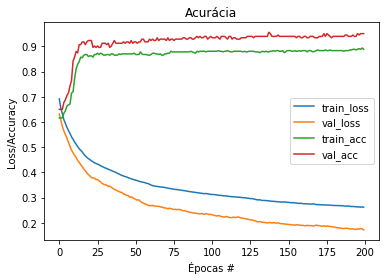

In [375]:
# Implementação da rede neural, utilizando 2 classes (diagnosis) e 200 épocas
batch_size = 64
num_classes = 2
epochs = 200

# Transformando os dados de entrada para float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Convertendo os vetores das classes em matrizes de classificação binárias
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Definição da arquitetura do modelo
model = Sequential()
# Camadas do modelo
model.add(tf.keras.layers.Dense(100, input_dim=30, activation='sigmoid'))
model.add(tf.keras.layers.Dense(25, input_dim=30, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Fim - Definição da arquitetura do modelo

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(0.0001),
              metrics=['accuracy'])

# Treinamento do modelo 
H = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Avaliação do modelo no conjunto de teste
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotando 'loss' e 'accuracy' para os datasets 'train' e 'test'
plt.figure()
plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), H.history["val_acc"], label="val_acc")
plt.title("Acurácia")
plt.xlabel("Épocas #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()